Loaded image: roses.jpg
Original Image Shape: (240, 320, 3)
Flat Image Shape: (240, 320, 3)
Light Image Shape: (240, 320, 3)
Dark Image Shape: (240, 320, 3)
Balanced Image Shape: (240, 320, 3)


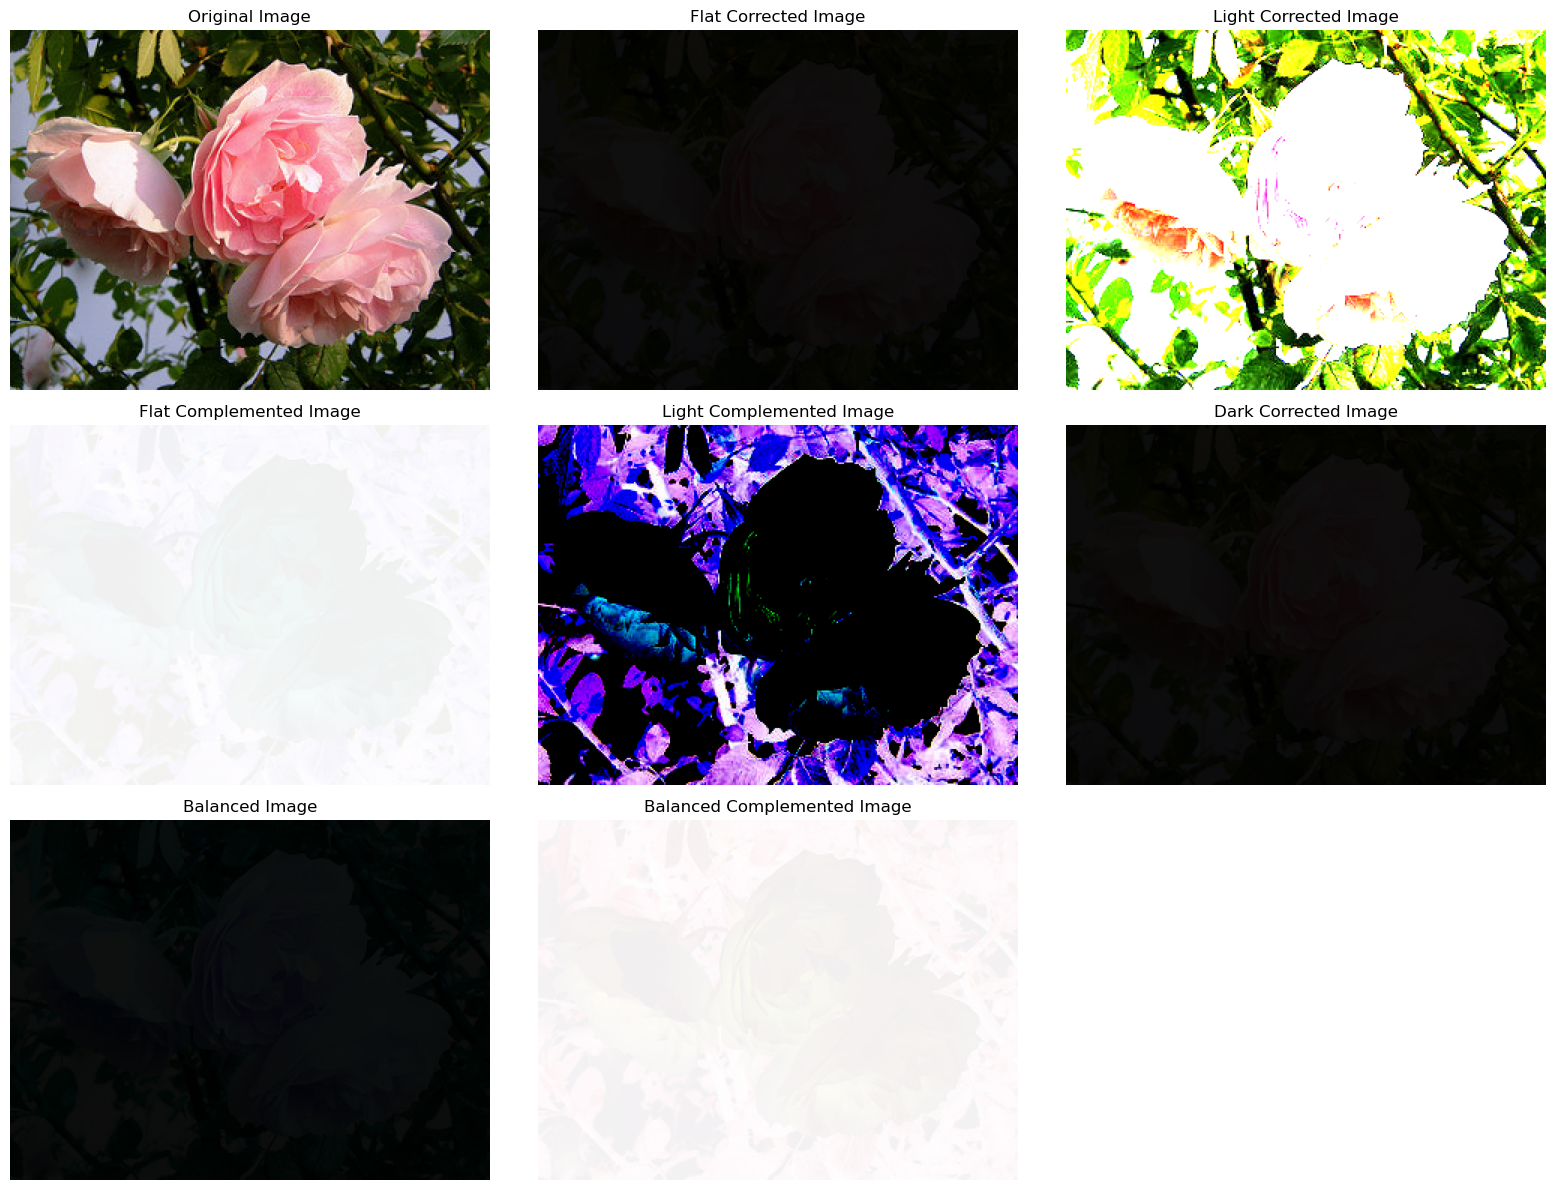

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for tonal corrections (adjusting brightness and contrast)
def apply_tonal_correction(image, correction_type='flat'):
    """
    Apply tonal corrections to the input image.
    Tonal corrections adjust the brightness and contrast of the image.
    
    Types of correction:
    - 'flat': Applies a gentle curve to enhance contrast in darker regions
    - 'light': Increases brightness by applying a power-law (gamma) transformation
    - 'dark': Reduces brightness by enhancing the dark areas
    """
    # Convert the image to RGB (as OpenCV loads images in BGR format)
    if image is None:
        print("Error: Image not found.")
        return None
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply different tonal corrections based on the chosen type
    if correction_type == 'flat':
        # Apply an S-shaped curve to enhance contrast, especially in darker regions.
        # This correction darkens shadows and brightens highlights, creating a more balanced image.
        lookup_table = np.linspace(0, 255, 256)
        lookup_table = np.clip(lookup_table ** 0.5, 0, 255).astype(np.uint8)  # Increasing contrast in the midtones.
    
    elif correction_type == 'light':
        # Power-law transformation (gamma correction) for a lighter image.
        # This correction lightens the overall image by increasing brightness.
        lookup_table = np.linspace(0, 255, 256)
        lookup_table = np.clip(lookup_table ** 1.5, 0, 255).astype(np.uint8)  # Making the image brighter overall.
    
    elif correction_type == 'dark':
        # Power-law transformation (gamma correction) for a darker image.
        # This correction focuses on darkening the overall image, enhancing shadows.
        lookup_table = np.linspace(0, 255, 256)
        lookup_table = np.clip(lookup_table ** 0.5, 0, 255).astype(np.uint8)  # Darkening the image, more emphasis on shadows.

    # Apply the tonal transformation to each pixel using the LUT (lookup table)
    corrected_image = cv2.LUT(image_rgb, lookup_table)
    return corrected_image

# Function for color balancing (adjusting RGB color channels)
def apply_color_balance(image, red_factor=1.0, green_factor=1.0, blue_factor=1.0):
    """
    Apply color balance adjustments to the image by modifying individual color channels.
    Color balancing allows for enhancing or reducing the intensity of each color channel.
    - red_factor: Multiplies the intensity of the red channel
    - green_factor: Multiplies the intensity of the green channel
    - blue_factor: Multiplies the intensity of the blue channel
    """
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Adjust the intensity of each channel (Red, Green, Blue) based on the specified factors
    image_rgb[:, :, 0] = np.clip(image_rgb[:, :, 0] * red_factor, 0, 255)  # Red channel
    image_rgb[:, :, 1] = np.clip(image_rgb[:, :, 1] * green_factor, 0, 255)  # Green channel
    image_rgb[:, :, 2] = np.clip(image_rgb[:, :, 2] * blue_factor, 0, 255)  # Blue channel
    
    return image_rgb

# Function to compute the complement (inverse) of an image
def get_complement(image):
    """
    Compute the complement (inverse) of the image.
    The complement inverts the pixel values, turning light pixels into dark and vice versa.
    This can help reveal hidden details or create an interesting effect.
    """
    return 255 - image  # Inverse of each pixel value

# Function to load image from the 'data/images' folder
# Function to load image from the 'data/images' folder
def load_image_from_folder(folder_path='data/images', image_name='roses.jpg'):
    """
    Load a specific image from the given folder.
    """
    try:
        # Build the image path
        image_path = os.path.join(folder_path, image_name)

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"Error: Image {image_name} not found in folder {folder_path}.")
            return None

        # Read the image using OpenCV
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error: Could not load image {image_name}.")
            return None
        else:
            print(f"Loaded image: {image_name}")
            return image

    except Exception as e:
        print(f"Error loading image from folder: {e}")
        return None

# Load the 'roses.jpg' image
image = load_image_from_folder(folder_path='data/images', image_name='roses.jpg')

# # Load an image from the 'data/images' folder
# image = load_image_from_folder()

# Check if the image was loaded properly
if image is None:
    print("Error: Could not load image.")
else:
    # Apply tonal corrections (flat, light, dark)
    flat_image = apply_tonal_correction(image, 'flat')  # Correct contrast to make the image more neutral.
    light_image = apply_tonal_correction(image, 'light')  # Lighten the image using a power-law transformation.
    dark_image = apply_tonal_correction(image, 'dark')  # Darken the image using a power-law transformation.

    # Apply color balancing to the dark-corrected image
    balanced_image = apply_color_balance(dark_image, red_factor=0.9, green_factor=1.1, blue_factor=1.0)
    # The color balance corrects the overall color by adjusting individual channels (e.g., reducing red, increasing green).

    # Compute the complements (inverses) of the processed images
    flat_complement = get_complement(flat_image)  # Get complement of the flat-corrected image
    light_complement = get_complement(light_image)  # Get complement of the light-corrected image
    dark_complement = get_complement(dark_image)  # Get complement of the dark-corrected image
    balanced_complement = get_complement(balanced_image)  # Get complement of the color-balanced image

    # Debugging: Check if the images are processed correctly
    print(f"Original Image Shape: {image.shape}")
    print(f"Flat Image Shape: {flat_image.shape if flat_image is not None else None}")
    print(f"Light Image Shape: {light_image.shape if light_image is not None else None}")
    print(f"Dark Image Shape: {dark_image.shape if dark_image is not None else None}")
    print(f"Balanced Image Shape: {balanced_image.shape if balanced_image is not None else None}")

    # Plot original, balanced, and complemented images in multiple rows and columns
    plt.figure(figsize=(16, 12))  # Increase figure size for better visibility

    # Display the original and corrected images in a grid
    # Row 1: Original & Processed Images
    plt.subplot(3, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(3, 3, 2)
    if flat_image is not None:
        plt.imshow(flat_image)
        plt.title("Flat Corrected Image")
    plt.axis('off')

    plt.subplot(3, 3, 3)
    if light_image is not None:
        plt.imshow(light_image)
        plt.title("Light Corrected Image")
    plt.axis('off')

    # Row 2: Complemented Images
    plt.subplot(3, 3, 4)
    if flat_complement is not None:
        plt.imshow(flat_complement)
        plt.title("Flat Complemented Image")
    plt.axis('off')

    plt.subplot(3, 3, 5)
    if light_complement is not None:
        plt.imshow(light_complement)
        plt.title("Light Complemented Image")
    plt.axis('off')

    # Row 3: Additional Images
    plt.subplot(3, 3, 6)
    if dark_image is not None:
        plt.imshow(dark_image)
        plt.title("Dark Corrected Image")
    plt.axis('off')

    plt.subplot(3, 3, 7)
    if balanced_image is not None:
        plt.imshow(balanced_image)
        plt.title("Balanced Image")
    plt.axis('off')

    plt.subplot(3, 3, 8)
    if balanced_complement is not None:
        plt.imshow(balanced_complement)
        plt.title("Balanced Complemented Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
